In [70]:
pip install koreanize_matplotlib

  Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl.metadata (992 bytes)
Using cached koreanize_matplotlib-0.1.1-py3-none-any.whl (7.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib


In [2]:
file_name = 'ObesityDataSet.csv'
file = pd.read_csv(file_name)
file

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
file_t = file[['SCC','FAF','MTRANS','NObeyesdad']].copy()
file_t

,SCC,FAF,MTRANS,NObeyesdad
0,no,0.000000,Public_Transportation,Normal_Weight
1,yes,3.000000,Public_Transportation,Normal_Weight
2,no,2.000000,Public_Transportation,Normal_Weight
3,no,2.000000,Walking,Overweight_Level_I
4,no,0.000000,Public_Transportation,Overweight_Level_II
...,...,...,...,...
2106,no,1.676269,Public_Transportation,Obesity_Type_III
2107,no,1.341390,Public_Transportation,Obesity_Type_III
2108,no,1.414209,Public_Transportation,Obesity_Type_III
2109,no,1.139107,Public_Transportation,Obesity_Type_III


In [4]:
file_t['Obeyes'] = ''
file_t

,SCC,FAF,MTRANS,NObeyesdad,Obeyes
0,no,0.000000,Public_Transportation,Normal_Weight,
1,yes,3.000000,Public_Transportation,Normal_Weight,
2,no,2.000000,Public_Transportation,Normal_Weight,
3,no,2.000000,Walking,Overweight_Level_I,
4,no,0.000000,Public_Transportation,Overweight_Level_II,
...,...,...,...,...,...
2106,no,1.676269,Public_Transportation,Obesity_Type_III,
2107,no,1.341390,Public_Transportation,Obesity_Type_III,
2108,no,1.414209,Public_Transportation,Obesity_Type_III,
2109,no,1.139107,Public_Transportation,Obesity_Type_III,


In [5]:
for i in range(len(file_t)):
    if file_t.iloc[i,-2] == 'Insufficient_Weight' :
        file_t.iloc[i,-1] = 0
    elif file_t.iloc[i,-2] == 'Normal_Weight' :
        file_t.iloc[i,-1] = 0
    else:
        file_t.iloc[i,-1] = 1

    # NObeyesdad가 Insufficient_Weight, Normal_Weight 인 경우는 비만 아님(0)

In [6]:
file_t

,SCC,FAF,MTRANS,NObeyesdad,Obeyes
0,no,0.000000,Public_Transportation,Normal_Weight,0
1,yes,3.000000,Public_Transportation,Normal_Weight,0
2,no,2.000000,Public_Transportation,Normal_Weight,0
3,no,2.000000,Walking,Overweight_Level_I,1
4,no,0.000000,Public_Transportation,Overweight_Level_II,1
...,...,...,...,...,...
2106,no,1.676269,Public_Transportation,Obesity_Type_III,1
2107,no,1.341390,Public_Transportation,Obesity_Type_III,1
2108,no,1.414209,Public_Transportation,Obesity_Type_III,1
2109,no,1.139107,Public_Transportation,Obesity_Type_III,1


In [31]:
# SCC ( 칼로리 섭취 모니터링 ) 과 비만 여부 
file_t_SCC = file_t.groupby(['SCC', 'Obeyes'])
file_t_SCC

In [34]:
file_t_SCC.count()

FAF  MTRANS  NObeyesdad
SCC Obeyes                          
no  0        507     507         507
    1       1508    1508        1508
yes 0         52      52          52
    1         44      44          44

In [48]:
file_t_SCC_count = file_t_SCC.count()
file_t_SCC_count

FAF  MTRANS  NObeyesdad
SCC Obeyes                          
no  0        507     507         507
    1       1508    1508        1508
yes 0         52      52          52
    1         44      44          44

In [49]:
file_t_SCC_count.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, ('no', 0) to ('yes', 1)
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   FAF         4 non-null      int64
 1   MTRANS      4 non-null      int64
 2   NObeyesdad  4 non-null      int64
dtypes: int64(3)
memory usage: 351.0+ bytes


In [50]:
file_t_SCC_count.reset_index(inplace = True)
file_t_SCC_count

,SCC,Obeyes,FAF,MTRANS,NObeyesdad
0,no,0,507,507,507
1,no,1,1508,1508,1508
2,yes,0,52,52,52
3,yes,1,44,44,44


In [57]:
file_t_SCC_count['name'] = file_t_SCC_count['SCC'].astype(str)+file_t_SCC_count['Obeyes'].astype(str)
file_t_SCC_count

,SCC,Obeyes,FAF,MTRANS,NObeyesdad,name
0,no,0,507,507,507,no0
1,no,1,1508,1508,1508,no1
2,yes,0,52,52,52,yes0
3,yes,1,44,44,44,yes1


In [65]:
file_t_SCC_count['name_f'] = ['모니터링 x, 비만 x', '모니터링 x, 비만 o','모니터링 o, 비만 x', '모니터링 o, 비만 o']

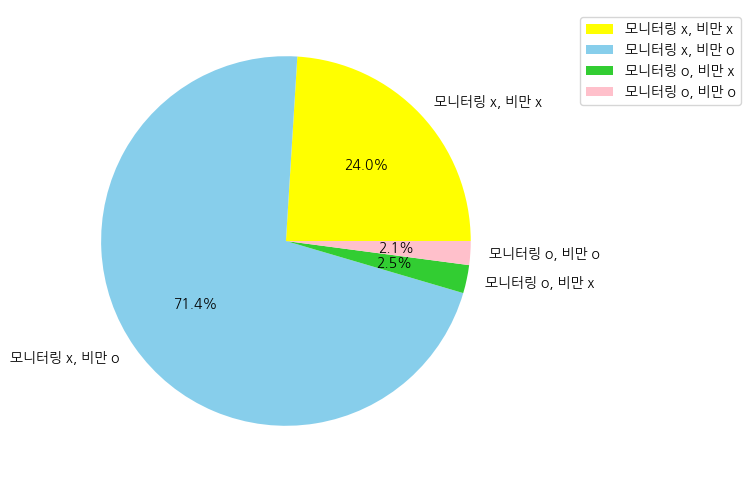

In [268]:
plt.figure(figsize=(10,6))
plt.pie(file_t_SCC_count['NObeyesdad'], labels =file_t_SCC_count['name_f'],autopct='%.1f%%', colors = ['yellow','skyblue','limegreen','pink'])
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

In [232]:
file_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SCC         2111 non-null   object 
 1   FAF         2111 non-null   float64
 2   MTRANS      2111 non-null   object 
 3   NObeyesdad  2111 non-null   object 
 4   Obeyes      2111 non-null   object 
dtypes: float64(1), object(4)
memory usage: 82.6+ KB


In [233]:
file_t

,SCC,FAF,MTRANS,NObeyesdad,Obeyes
0,no,0.000000,Public_Transportation,Normal_Weight,0
1,yes,3.000000,Public_Transportation,Normal_Weight,0
2,no,2.000000,Public_Transportation,Normal_Weight,0
3,no,2.000000,Walking,Overweight_Level_I,1
4,no,0.000000,Public_Transportation,Overweight_Level_II,1
...,...,...,...,...,...
2106,no,1.676269,Public_Transportation,Obesity_Type_III,1
2107,no,1.341390,Public_Transportation,Obesity_Type_III,1
2108,no,1.414209,Public_Transportation,Obesity_Type_III,1
2109,no,1.139107,Public_Transportation,Obesity_Type_III,1


In [240]:
file_lo[['SCC','Obeyes']]

,SCC,Obeyes
0,0,0
1,1,0
2,0,0
3,0,1
4,0,1
...,...,...
2106,0,1
2107,0,1
2108,0,1
2109,0,1


In [242]:
file_lo['SCC']

0       0
1       1
2       0
3       0
4       0
       ..
2106    0
2107    0
2108    0
2109    0
2110    0
Name: SCC, Length: 2111, dtype: object

In [250]:
file_lo['Obeyes'].value_counts()

Obeyes
1    1552
0     559
Name: count, dtype: int64

In [284]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 독립 변수(X)와 종속 변수(y) 설정
X = file_lo['SCC'].values.reshape(-1, 1)
y = list(file_lo['Obeyes'])

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
result=model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("정확도:", accuracy)
print("분류 보고서:\n", class_report)

# 비만이 아닌 경우에 대한 데이터가 비만인 경우보다 많이 부족하므로 
# 비만에 대해 모델이 더 잘 작동하는 반면, 비만이 아닌 경우를 예측하는 데 어렵다.
# 비만이 아닌 경우에 대한 정확한 예측이 부족함을 알 수 있습니다.

정확도: 0.7145110410094637
분류 보고서:
               precision    recall  f1-score   support

           0       0.47      0.08      0.14       179
           1       0.73      0.96      0.83       455

    accuracy                           0.71       634
   macro avg       0.60      0.52      0.49       634
weighted avg       0.65      0.71      0.63       634



In [289]:
file_lo_1_3 = file_lo[file_lo['Obeyes'] == 1].sample(n=600, random_state = 2014)
file_lo_0_3= file_lo[file_lo['Obeyes'] == 0]
file_lo_3 = pd.concat([file_lo_0_3,file_lo_1_3])
file_lo_3

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obeyes
0,1,21.000000,1.620000,64.000000,1,0,2.000000,3.000000,1,0,2.000000,0,0.000000,1.000000,0,1,Normal_Weight,0
1,1,21.000000,1.520000,56.000000,1,0,3.000000,3.000000,1,1,3.000000,1,3.000000,0.000000,1,1,Normal_Weight,0
2,0,23.000000,1.800000,77.000000,1,0,2.000000,3.000000,1,0,2.000000,0,2.000000,1.000000,1,1,Normal_Weight,0
5,0,29.000000,1.620000,53.000000,0,1,2.000000,3.000000,1,0,2.000000,0,0.000000,0.000000,1,1,Normal_Weight,0
6,1,23.000000,1.500000,55.000000,1,1,3.000000,3.000000,1,0,2.000000,0,1.000000,0.000000,1,1,Normal_Weight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,0,30.870724,1.670774,101.626189,1,1,2.907744,3.990925,1,0,1.000000,0,1.999750,0.000000,0,1,Obesity_Type_II,1
1569,0,26.740655,1.863883,120.202596,1,1,2.247795,3.000000,1,0,2.816015,0,0.712726,0.000000,1,1,Obesity_Type_II,1
812,0,19.216380,1.812472,86.748295,1,1,2.000000,3.000000,1,0,2.168651,0,0.977998,0.142638,1,1,Overweight_Level_I,1
1271,1,18.000000,1.670058,86.242679,1,1,2.609123,3.000000,1,0,1.955053,0,1.186013,0.000000,0,1,Obesity_Type_I,1


In [290]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 독립 변수(X)와 종속 변수(y) 설정
X = file_lo_3['SCC'].values.reshape(-1, 1)
y = list(file_lo_3['Obeyes'])

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
result=model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("정확도:", accuracy)
print("분류 보고서:\n", class_report)

# 비만이 아닌 경우에 대한 데이터가 비만인 경우보다 많이 부족하므로 
# 비만에 대해 모델이 더 잘 작동하는 반면, 비만이 아닌 경우를 예측하는 데 어렵다.
# 비만이 아닌 경우에 대한 정확한 예측이 부족함을 알 수 있습니다.

정확도: 0.5229885057471264
분류 보고서:
               precision    recall  f1-score   support

           0       0.72      0.10      0.18       177
           1       0.51      0.96      0.66       171

    accuracy                           0.52       348
   macro avg       0.61      0.53      0.42       348
weighted avg       0.62      0.52      0.42       348



In [78]:
# MTRANS ( 사용한 교통수단 ) 과 비만 여부 
file_t_MTRANS = file_t.groupby(['MTRANS', 'Obeyes'])
file_t_MTRANS

In [79]:
file_t_MTRANS.count()

SCC   FAF  NObeyesdad
MTRANS                Obeyes                        
Automobile            0         91    91          91
                      1        366   366         366
Bike                  0          4     4           4
                      1          3     3           3
Motorbike             0          6     6           6
                      1          5     5           5
Public_Transportation 0        420   420         420
                      1       1160  1160        1160
Walking               0         38    38          38
                      1         18    18          18

In [80]:
file_t_MTRANS_count = file_t_MTRANS.count()
file_t_MTRANS_count

SCC   FAF  NObeyesdad
MTRANS                Obeyes                        
Automobile            0         91    91          91
                      1        366   366         366
Bike                  0          4     4           4
                      1          3     3           3
Motorbike             0          6     6           6
                      1          5     5           5
Public_Transportation 0        420   420         420
                      1       1160  1160        1160
Walking               0         38    38          38
                      1         18    18          18

In [81]:
file_t_MTRANS_count.reset_index(inplace = True)
file_t_MTRANS_count

,MTRANS,Obeyes,SCC,FAF,NObeyesdad
0,Automobile,0,91,91,91
1,Automobile,1,366,366,366
2,Bike,0,4,4,4
3,Bike,1,3,3,3
4,Motorbike,0,6,6,6
5,Motorbike,1,5,5,5
6,Public_Transportation,0,420,420,420
7,Public_Transportation,1,1160,1160,1160
8,Walking,0,38,38,38
9,Walking,1,18,18,18


In [82]:
file_t_MTRANS_count['name'] = file_t_MTRANS_count['MTRANS'].astype(str)+file_t_MTRANS_count['Obeyes'].astype(str)
file_t_MTRANS_count

,MTRANS,Obeyes,SCC,FAF,NObeyesdad,name
0,Automobile,0,91,91,91,Automobile0
1,Automobile,1,366,366,366,Automobile1
2,Bike,0,4,4,4,Bike0
3,Bike,1,3,3,3,Bike1
4,Motorbike,0,6,6,6,Motorbike0
5,Motorbike,1,5,5,5,Motorbike1
6,Public_Transportation,0,420,420,420,Public_Transportation0
7,Public_Transportation,1,1160,1160,1160,Public_Transportation1
8,Walking,0,38,38,38,Walking0
9,Walking,1,18,18,18,Walking1


In [112]:
file_t_MTRANS_count_0 = file_t_MTRANS_count[file_t_MTRANS_count['Obeyes'] == 0]
file_t_MTRANS_count_1 = file_t_MTRANS_count[file_t_MTRANS_count['Obeyes'] == 1]

In [113]:
file_t_MTRANS_count_0

,MTRANS,Obeyes,SCC,FAF,NObeyesdad,name,name_f
0,Automobile,0,91,91,91,Automobile0,"자동차, 비만 x"
2,Bike,0,4,4,4,Bike0,"자전거, 비만 x"
4,Motorbike,0,6,6,6,Motorbike0,"오토바이, 비만 o"
6,Public_Transportation,0,420,420,420,Public_Transportation0,"대중교통, 비만 x"
8,Walking,0,38,38,38,Walking0,"걷기, 비만 x"


In [122]:
list(file_t_MTRANS_count_0['MTRANS'])

['Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking']

In [85]:
file_t_MTRANS_count['name_f'] = ['자동차, 비만 x', '자동차, 비만 o','자전거, 비만 x', '자전거, 비만 o','오토바이, 비만 o','오토바이, 비만 x','대중교통, 비만 x','대중교통, 비만 o','걷기, 비만 x','걷기, 비만 o']

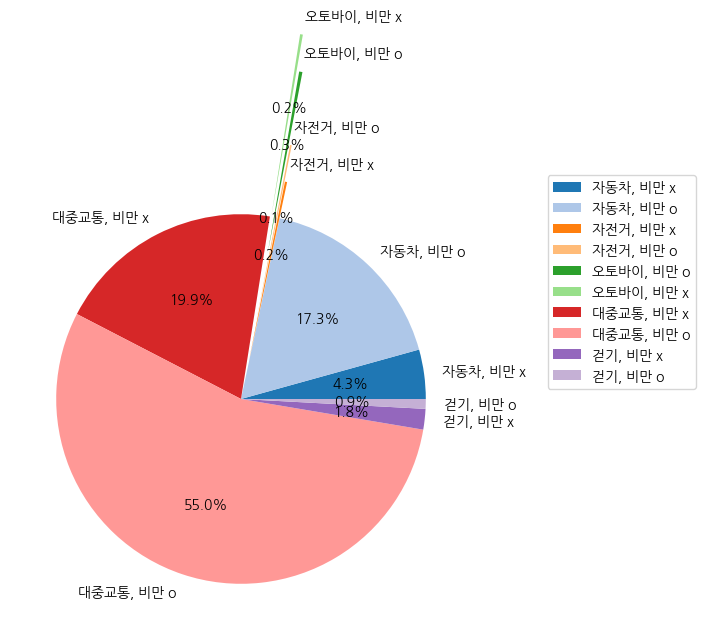

In [274]:
plt.figure(figsize=(10,6))
explode = [0,0,0.2,0.4,0.8,1.0,0,0,0,0]
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(explode)))
plt.pie(file_t_MTRANS_count['NObeyesdad'], labels =file_t_MTRANS_count['name_f'],autopct='%.1f%%', explode = explode, colors= colors)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

In [150]:
file_t_MTRANS_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MTRANS      10 non-null     object
 1   Obeyes      10 non-null     int64 
 2   SCC         10 non-null     int64 
 3   FAF         10 non-null     int64 
 4   NObeyesdad  10 non-null     int64 
 5   name        10 non-null     object
 6   name_f      10 non-null     object
dtypes: int64(4), object(3)
memory usage: 688.0+ bytes


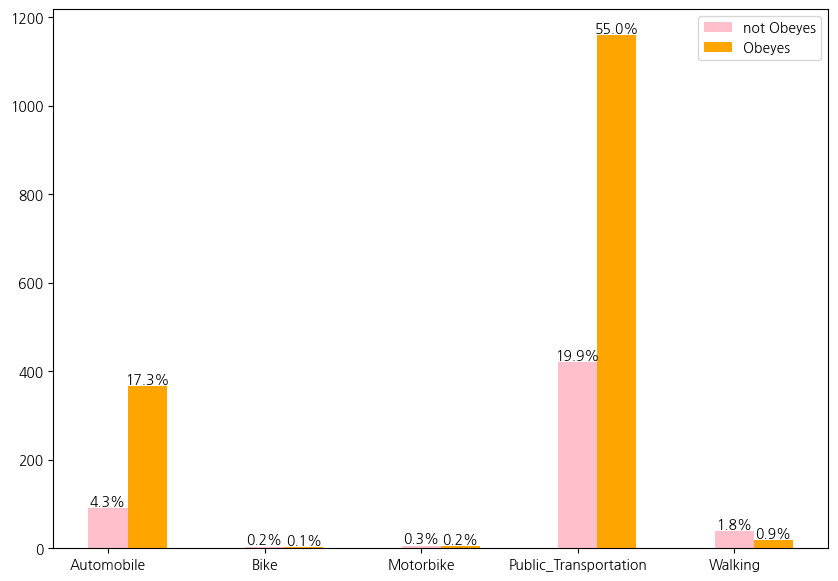

In [259]:
fig, ax = plt.subplots(figsize = (10,7))
bar_width = 0.25

index = np.arange(5)

total = sum(file_t_MTRANS_count['NObeyesdad'])

b1 = plt.bar(index, file_t_MTRANS_count_0['NObeyesdad'],bar_width, color = 'pink', label = 'not Obeyes')
for rect in b1:
    height = rect.get_height()
    percentage = height / total * 100
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')
             
b2 = plt.bar(index+bar_width, file_t_MTRANS_count_1['NObeyesdad'],bar_width, color = 'orange', label = 'Obeyes')
for rect in b2:
    height = rect.get_height()
    percentage = height / total * 100
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')
             
plt.xticks(np.arange(5),list(file_t_MTRANS_count_0['MTRANS']))

plt.legend()
plt.show()

In [157]:
# FAF ( 신체 활동 빈도 ) 과 비만 여부 
file_t_FAF = file_t[['FAF','Obeyes']].copy()
file_t_FAF

,FAF,Obeyes
0,0.000000,0
1,3.000000,0
2,2.000000,0
3,2.000000,1
4,0.000000,1
...,...,...
2106,1.676269,1
2107,1.341390,1
2108,1.414209,1
2109,1.139107,1


In [155]:
file_t['FAF'].value_counts()

FAF
0.000000    411
1.000000    234
2.000000    183
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: count, Length: 1190, dtype: int64

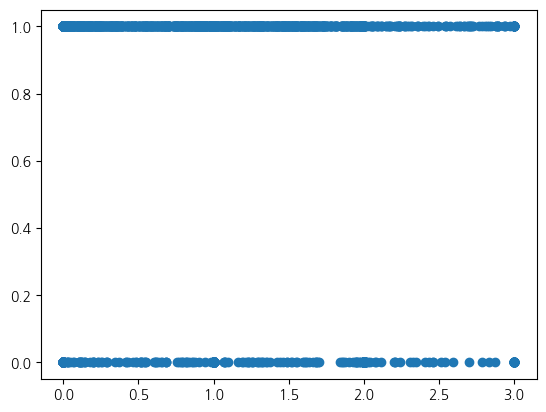

In [162]:
plt.scatter(file_t_FAF['FAF'], file_t_FAF['Obeyes'])

In [164]:
file_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SCC         2111 non-null   object 
 1   FAF         2111 non-null   float64
 2   MTRANS      2111 non-null   object 
 3   NObeyesdad  2111 non-null   object 
 4   Obeyes      2111 non-null   object 
dtypes: float64(1), object(4)
memory usage: 82.6+ KB


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def logistic(x_col, name):
    # 설명변수와 종속변수
    X = x_col.values.reshape(-1, 1)
    y = file_t['Obeyes'].astype(int).values

    # 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

    # 이분형 로지스틱 회귀모델 학습
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # 예측 확률 계산 (0과 1 사이의 확률 값)
    X_test_sorted = np.sort(X_test, axis=0)
    y_prob = model.predict_proba(X_test_sorted)[:, 1]

    # 시각화
    plt.figure(figsize=(8, 6))

    # 데이터 산점도 (테스트 데이터)
    plt.scatter(X_test, y_test, color='black', label='Data', alpha=0.5)

    # 로지스틱 회귀 곡선 (예측 확률)
    plt.plot(X_test_sorted, y_prob, color='red', label='Logistic Regression Curve')

    # 그래프 설정
    plt.xlabel(name)
    plt.ylabel('Probability of Obeyes=1')
    plt.title('Prediction Logistic Regression Curve')
    plt.legend()
    plt.show()

    import statsmodels.api as sm

    X = x_col.values.reshape(-1, 1)
    y = file_t['Obeyes'].astype(int).values

    # 상수항 추가 (로지스틱 회귀를 위한)
    X = sm.add_constant(X)

    # 이분형 로지스틱 회귀모델 학습
    model = sm.Logit(y, X)
    result = model.fit()

    # 모델 요약 출력
    print(result.summary())

    # 통계값 구하기 (McFadden's R²)
    ll_null = model.fit(disp=0).llnull  # Null model의 로그 가능도
    ll_model = result.llf  # Fit한 모델의 로그 가능도
    mcfadden_r2 = 1 - (ll_model / ll_null)
    print(f"McFadden's R-squared: {mcfadden_r2:.4f}")


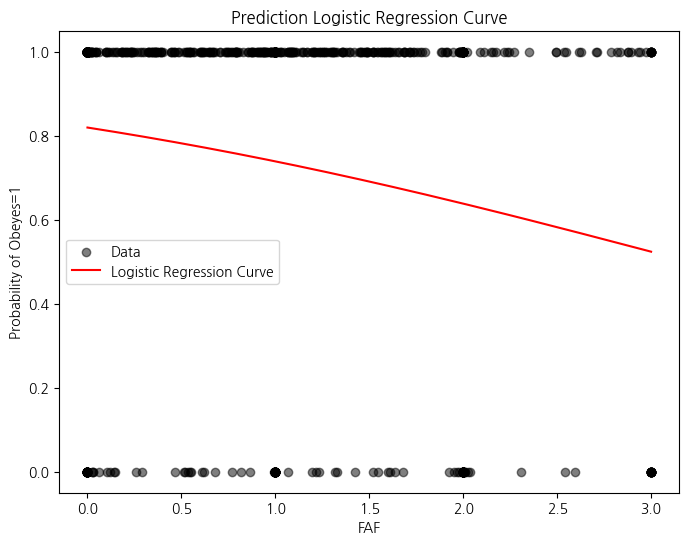

Optimization terminated successfully.
         Current function value: 0.564085
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2111
Model:                          Logit   Df Residuals:                     2109
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                 0.02411
Time:                        10:11:26   Log-Likelihood:                -1190.8
converged:                       True   LL-Null:                       -1220.2
Covariance Type:            nonrobust   LLR p-value:                 1.710e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4986      0.083     17.992      0.000       1.335       1.662
x1            -0.4411      0.

In [254]:
logistic(file_t['FAF'], 'FAF')

In [285]:
# 설명변수(X)와 종속변수(y) 설정
X = file_lo['FAF'].values.reshape(-1, 1)
y = list(file_lo['Obeyes'])

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("정확도:", accuracy)
print("분류 보고서:\n", class_report)

정확도: 0.7176656151419558
분류 보고서:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       179
           1       0.72      1.00      0.84       455

    accuracy                           0.72       634
   macro avg       0.36      0.50      0.42       634
weighted avg       0.52      0.72      0.60       634



c:\Users\KDP-35\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KDP-35\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KDP-35\anaconda3\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [195]:
file_t_FAF['FAF_round'] = np.round(file_t_FAF['FAF']).astype(int)
file_t_FAF

C:\Users\KDP-35\AppData\Local\Temp\ipykernel_7432\2198668651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_t_FAF['FAF_round'] = np.round(file_t_FAF['FAF']).astype(int)


,FAF,Obeyes,FAF_round
0,0.000000,0,0
1,3.000000,0,3
2,2.000000,0,2
3,2.000000,1,2
4,0.000000,1,0
...,...,...,...
2106,1.676269,1,2
2107,1.341390,1,1
2108,1.414209,1,1
2109,1.139107,1,1


In [196]:
file_t_FAF['FAF_round'].unique()

array([0, 3, 2, 1])

In [197]:
file_t_FAF_Obeyes_0 = file_t_FAF[file_t_FAF['Obeyes'] == 0]
file_t_FAF_Obeyes_1 = file_t_FAF[file_t_FAF['Obeyes'] == 1]

In [198]:
file_t_FAF_Obeyes_0

,FAF,Obeyes,FAF_round
0,0.000000,0,0
1,3.000000,0,3
2,2.000000,0,2
5,0.000000,0,0
6,1.000000,0,1
...,...,...,...
740,0.463949,0,0
741,0.000000,0,0
742,0.023574,0,0
743,1.487987,0,1


In [199]:
file_t_FAF_Obeyes_count_0 = file_t_FAF_Obeyes_0.groupby('FAF_round').count()
file_t_FAF_Obeyes_count_0

,FAF,Obeyes
FAF_round,,
0,152,152
1,169,169
2,186,186
3,52,52


In [201]:
file_t_FAF_Obeyes_count_1 = file_t_FAF_Obeyes_1.groupby('FAF_round').count()
file_t_FAF_Obeyes_count_1

,FAF,Obeyes
FAF_round,,
0,568,568
1,607,607
2,310,310
3,67,67


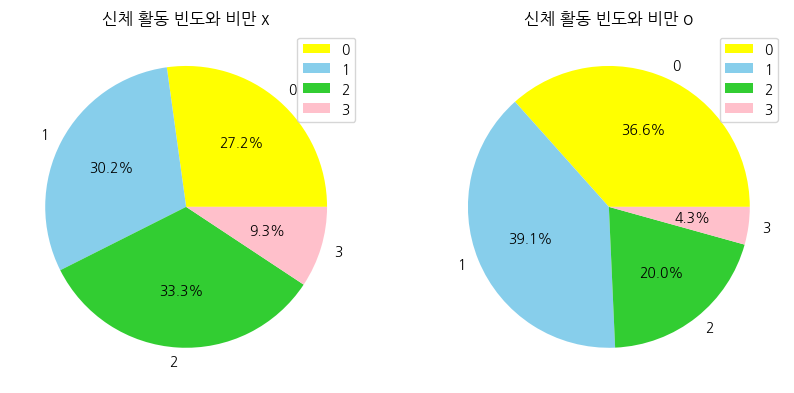

In [282]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)

plt.pie(file_t_FAF_Obeyes_count_0['Obeyes'], labels =file_t_FAF_Obeyes_count_0.index,autopct='%.1f%%', colors= ['yellow','skyblue','limegreen','pink'])
plt.legend()
plt.title('신체 활동 빈도와 비만 x')


plt.subplot(1, 2, 2)
plt.pie(file_t_FAF_Obeyes_count_1['Obeyes'], labels =file_t_FAF_Obeyes_count_1.index,autopct='%.1f%%', colors = ['yellow','skyblue','limegreen','pink'])
plt.legend()
plt.title('신체 활동 빈도와 비만 o')

plt.show()

In [207]:
file_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SCC         2111 non-null   object 
 1   FAF         2111 non-null   float64
 2   MTRANS      2111 non-null   object 
 3   NObeyesdad  2111 non-null   object 
 4   Obeyes      2111 non-null   object 
dtypes: float64(1), object(4)
memory usage: 82.6+ KB


In [210]:
file_lo = file.copy()

In [234]:
for i in range(len(file_lo)):
    for j in range(len(file_lo.columns)):
        if file_lo.iloc[i,j] == 'no':
            file_lo.iloc[i,j] = 0
        elif file_lo.iloc[i,j] == 'yes':
            file_lo.iloc[i,j] = 1

    if file_lo.iloc[i,0] == 'Male':
        file_lo.iloc[i,0] = 0 # 남자는 0
    elif file_lo.iloc[i,0] == 'Female':
        file_lo.iloc[i,0] = 1 # 여자는 1

    if file_lo.iloc[i,8] != 0: # 식사 사이 음식 섭취 네 / 아니오 처리
        file_lo.iloc[i,8] = 1

    if file_lo.iloc[i,-3] != 0: # 알코올 섭취 네 / 아니오 처리
        file_lo.iloc[i,-3] = 1

In [235]:
file_lo

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obeyes
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,1,Normal_Weight,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,1,Normal_Weight,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,1,1,Normal_Weight,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,1,1,Overweight_Level_I,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,1,Overweight_Level_II,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,1,Obesity_Type_III,1
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,1,Obesity_Type_III,1
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,1,Obesity_Type_III,1
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,1,Obesity_Type_III,1


In [215]:
file_lo['Obeyes'] = ''
for i in range(len(file_lo)):
    if file_lo.iloc[i,-2] == 'Insufficient_Weight' :
        file_lo.iloc[i,-1] = 0
    elif file_lo.iloc[i,-2] == 'Normal_Weight' :
        file_lo.iloc[i,-1] = 0
    else:
        file_lo.iloc[i,-1] = 1

    # NObeyesdad가 Insufficient_Weight, Normal_Weight 인 경우는 비만 아님(0)

In [216]:
file_lo

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obeyes
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,Public_Transportation,Normal_Weight,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Public_Transportation,Normal_Weight,0
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,1,Public_Transportation,Normal_Weight,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,1,Walking,Overweight_Level_I,1
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,Public_Transportation,Overweight_Level_II,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,Public_Transportation,Obesity_Type_III,1
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,Public_Transportation,Obesity_Type_III,1
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,Public_Transportation,Obesity_Type_III,1
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,Public_Transportation,Obesity_Type_III,1


In [226]:
for col in file_lo.columns:
    print(file_lo[col].unique())


[1 0]
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
[1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
[ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
[1 0]
[0 1]
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421
 2.753752 2.318355 2.594653 2.886157 2.967853 2.619835 1.0

In [ ]:
# 성별, 비만 가족력, 고칼로리 음식 자주 섭취, 채소 섭취 빈도, 식사사이 음식 섭취, 칼로리 섭취 모니터링, 알코올 섭취, 사용한 교통수단 -> 비만 여부 

In [ ]:
# 나이, 키, 몸무게, 주요 식사 횟수, 하루 물 섭취량, 신체 활동 빈도